In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import functions as fs
import joblib

In [45]:
# Load the model
model = joblib.load('GBR.pkl')

In [46]:
# Check if the model has the 'feature_names_in_' attribute
if hasattr(model, 'feature_names_in_'):
    feature_names = model.feature_names_in_.tolist()
    print("Feature Names:", feature_names)
else:
    print("The model does not contain feature names.")

Feature Names: ['Valence_electron_concentration_ref_Avg', 'Ni', 'Cr', 'Co', 'Ti', 'Al', 'Fe', 'Mn', 'Si', 'Nb', 'Hf', 'invT', 'Smix_HEA', 'DeltaSize_HEA', 'Electroneg_HEA', 'Hmix_HEA', 'Omega_HEA', 'Al+Cr', 'Cr/Al']


In [47]:
###############Import full range prediction data from docs, precalculated to save time###################
file_path = 'docs/FullPredictiondata.csv'
df = pd.read_csv(file_path, index_col=0)
# df

,Valence_electron_concentration_ref_Avg,Ni,Co,Cr,Smix_HEA,DeltaSize_HEA,Electroneg_HEA,Hmix_HEA,Omega_HEA,Al+Cr,Cr/Al,Al,Fe,invT
0,8.00,0.0,0.0,0.0,-0.000000,0.000000,0.000000,0.0000,NaN,0.0,0.0,0.0,100.0,0.702741
1,7.95,0.0,0.0,0.0,0.465597,0.015290,0.021890,-0.4356,1.926490,1.0,0.0,1.0,99.0,0.702741
2,7.90,0.0,0.0,0.0,0.815097,0.021481,0.030800,-0.8624,1.695217,2.0,0.0,2.0,98.0,0.702741
3,7.85,0.0,0.0,0.0,1.120246,0.026134,0.037529,-1.2804,1.561573,3.0,0.0,3.0,97.0,0.702741
4,7.80,0.0,0.0,0.0,1.396288,0.029975,0.043111,-1.6896,1.467724,4.0,0.0,4.0,96.0,0.702741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598121,9.98,99.0,0.0,0.0,0.465597,0.000399,0.007960,-0.0792,10.164236,0.0,0.0,0.0,1.0,0.702741
4598122,9.93,99.0,0.0,0.0,0.465597,0.014831,0.029850,-0.8712,0.919331,1.0,0.0,1.0,0.0,0.702741
4598123,9.99,99.0,1.0,0.0,0.465597,0.000399,0.002985,0.0000,inf,0.0,0.0,0.0,0.0,0.702741
4598124,9.96,99.0,0.0,1.0,0.465597,0.000240,0.024875,-0.2772,2.910265,1.0,0.0,0.0,0.0,0.702741


In [48]:
predictdf = pd.DataFrame(columns=feature_names)
for col in predictdf.columns:
    if col in df.columns:
        predictdf[col] = df[col]
###########################################################
predictdf = predictdf.fillna(0)
# Replace infinity values with 0
predictdf.replace([np.inf, -np.inf], 0, inplace=True)
###########################################################
df['kp'] = model.predict(predictdf)
df['10**kp'] = 10**df['kp']

/tmp/ipykernel_9125/1576153238.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predictdf = predictdf.fillna(0)


,Valence_electron_concentration_ref_Avg,Ni,Co,Cr,Smix_HEA,DeltaSize_HEA,Electroneg_HEA,Hmix_HEA,Omega_HEA,Al+Cr,Cr/Al,Al,Fe,invT,kp,10**kp
0,8.00,0.0,0.0,0.0,-0.000000,0.000000,0.000000,0.0000,NaN,0.0,0.0,0.0,100.0,0.702741,-9.141590,7.217883e-10
1,7.95,0.0,0.0,0.0,0.465597,0.015290,0.021890,-0.4356,1.926490,1.0,0.0,1.0,99.0,0.702741,-8.400186,3.979364e-09
2,7.90,0.0,0.0,0.0,0.815097,0.021481,0.030800,-0.8624,1.695217,2.0,0.0,2.0,98.0,0.702741,-8.599946,2.512198e-09
3,7.85,0.0,0.0,0.0,1.120246,0.026134,0.037529,-1.2804,1.561573,3.0,0.0,3.0,97.0,0.702741,-8.620362,2.396833e-09
4,7.80,0.0,0.0,0.0,1.396288,0.029975,0.043111,-1.6896,1.467724,4.0,0.0,4.0,96.0,0.702741,-9.037401,9.174852e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598121,9.98,99.0,0.0,0.0,0.465597,0.000399,0.007960,-0.0792,10.164236,0.0,0.0,0.0,1.0,0.702741,-8.419493,3.806331e-09
4598122,9.93,99.0,0.0,0.0,0.465597,0.014831,0.029850,-0.8712,0.919331,1.0,0.0,1.0,0.0,0.702741,-9.099541,7.951677e-10
4598123,9.99,99.0,1.0,0.0,0.465597,0.000399,0.002985,0.0000,inf,0.0,0.0,0.0,0.0,0.702741,-9.287628,5.156699e-10
4598124,9.96,99.0,0.0,1.0,0.465597,0.000240,0.024875,-0.2772,2.910265,1.0,0.0,0.0,0.0,0.702741,-8.402857,3.954964e-09


In [49]:
df = df[(df['Ni'] % 2 == 0) & (df['Cr'] %2 == 0) & (df['Co'] % 2 == 0)
                         & (df['Al'] % 2 == 0) & (df['Fe'] %2 == 0)]
df.reset_index(drop=True, inplace=True)

,Valence_electron_concentration_ref_Avg,Ni,Co,Cr,Smix_HEA,DeltaSize_HEA,Electroneg_HEA,Hmix_HEA,Omega_HEA,Al+Cr,Cr/Al,Al,Fe,invT,kp,10**kp
0,8.00,0.0,0.0,0.0,-0.000000,0.000000,0.000000,0.0000,NaN,0.0,0.0,0.0,100.0,0.702741,-9.141590,7.217883e-10
1,7.90,0.0,0.0,0.0,0.815097,0.021481,0.030800,-0.8624,1.695217,2.0,0.0,2.0,98.0,0.702741,-8.599946,2.512198e-09
2,7.80,0.0,0.0,0.0,1.396288,0.029975,0.043111,-1.6896,1.467724,4.0,0.0,4.0,96.0,0.702741,-9.037401,9.174852e-10
3,7.70,0.0,0.0,0.0,1.887008,0.036217,0.052247,-2.4816,1.337155,6.0,0.0,6.0,94.0,0.702741,-9.318034,4.808013e-10
4,7.60,0.0,0.0,0.0,2.317689,0.041246,0.059685,-3.2384,1.245969,8.0,0.0,8.0,92.0,0.702741,-9.373024,4.236191e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316246,9.96,98.0,0.0,0.0,0.815097,0.000562,0.011200,-0.1568,8.992113,0.0,0.0,0.0,2.0,0.702741,-8.419493,3.806331e-09
316247,9.86,98.0,0.0,0.0,0.815097,0.020837,0.042000,-1.7248,0.809169,2.0,0.0,2.0,0.0,0.702741,-8.783037,1.648021e-09
316248,9.98,98.0,2.0,0.0,0.815097,0.000562,0.004200,0.0000,inf,0.0,0.0,0.0,0.0,0.702741,-9.287628,5.156699e-10
316249,9.92,98.0,0.0,2.0,0.815097,0.000337,0.035000,-0.5488,2.580136,2.0,0.0,0.0,0.0,0.702741,-8.402857,3.954964e-09


In [50]:
###############Import umap coordinate of the full range prediction data from docs, precalculated to save time###################
file_path = 'docs/UMAP.csv'
# Read the Excel file into a pandas DataFrame
selected_rows = pd.read_csv(file_path)#, index_col=0
###########################################################
df['UMAP_1'] = selected_rows['UMAP_1']
df['UMAP_2'] = selected_rows['UMAP_2']

/tmp/ipykernel_9125/65882869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UMAP_1'] = selected_rows['UMAP_1']
/tmp/ipykernel_9125/65882869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UMAP_2'] = selected_rows['UMAP_2']


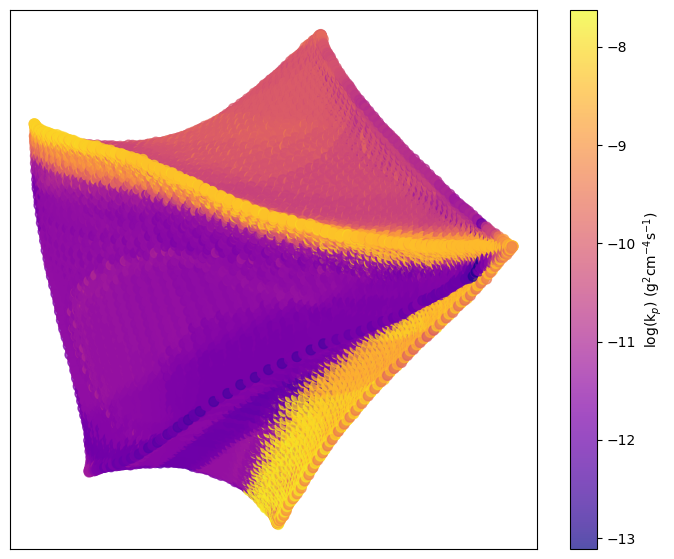

In [52]:
#########################Plot the entire prediction result#########################################
plt.figure(figsize=(8.5,7))#
# Plot the UMAP embedding
scatter=plt.scatter(df['UMAP_1'], df['UMAP_2'], c=df['kp'], cmap='plasma', edgecolors= None,s=50, alpha=0.7)#, vmin=-13.5, vmax=-11.8
# Hide axis labels
# plt.colorbar(label='Column C')
plt.colorbar(scatter, label=r'log(k$_{p}$) (g${^2}$cm$^{-4}$s$^{-1}$)')
plt.xticks([])
plt.yticks([])
dpi = 2400
# plt.savefig('UMAP_alloy_composition_prediction.png', bbox_inches='tight', dpi=dpi)
plt.show()

In [53]:
###############Import CALPHAD data of the final composition candidates
# ####################after guided alloy selection from docs ################
file_path = 'Predictionphasedata.csv'
df_phase = pd.read_csv(file_path, index_col=0)
# df_phase

,Valence_electron_concentration_ref_Avg,name,Alloy_Ni,Alloy_Cr,Alloy_Co,Alloy_Al,Alloy_Fe,phase_name,phase_fraction,Ni,...,invT,Smix_HEA,DeltaSize_HEA,Electroneg_HEA,Hmix_HEA,Omega_HEA,Al+Cr,Cr/Al,UMAP_1,UMAP_2
0,7.473,1,50.0,14,10,20,6,BCC_B2#2,0.466,49.7,...,0.702741,10.489885,0.064763,0.136473,-17.569292,0.918946,36.8,0.264605,15.905938,5.070136
1,8.127,1,50.0,14,10,20,6,FCC_L12#1,0.534,50.3,...,0.702741,11.229357,0.047435,0.121453,-11.100188,1.751408,31.5,1.625000,18.305052,8.733973
2,7.496,2,50.0,14,12,18,6,BCC_B2#2,0.344,49.2,...,0.702741,10.561622,0.064622,0.135953,-17.469276,0.930386,36.1,0.249135,16.216427,5.189121
3,8.171,2,50.0,14,12,18,6,FCC_L12#1,0.656,50.4,...,0.702741,11.266959,0.047901,0.120362,-11.101004,1.746442,29.9,1.430894,18.362310,7.900371
4,8.152,3,50.0,14,12,20,4,FCC_L12#1,0.535,50.4,...,0.702741,11.090691,0.047807,0.122103,-11.291484,1.697486,31.5,1.560976,18.616085,8.293648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,7.727,1984,34.0,14,10,22,20,FCC_L12#1,0.304,27.3,...,0.702741,12.444455,0.039889,0.110738,-7.828796,2.885241,34.6,3.379747,7.627952,9.979818
3735,7.258,1985,32.0,14,12,22,20,BCC_B2#2,0.722,34.7,...,0.702741,12.410940,0.064053,0.129065,-15.575628,1.250272,36.5,0.327273,9.103292,5.210279
3736,7.701,1985,32.0,14,12,22,20,FCC_L12#1,0.278,25.0,...,0.702741,12.557801,0.039208,0.109888,-7.574216,3.014858,34.7,3.565789,6.622508,10.187318
3737,7.772,1986,34.0,16,12,20,18,FCC_L12#1,0.401,29.1,...,0.702741,12.599846,0.040041,0.112548,-8.140912,2.801769,34.8,3.350000,9.576909,9.583904


In [54]:
predictdf = pd.DataFrame(columns=feature_names)
for col in predictdf.columns:
    if col in df_phase.columns:
        predictdf[col] = df_phase[col]
###########################################################
predictdf = predictdf.fillna(0)
# Replace infinity values with 0
predictdf.replace([np.inf, -np.inf], 0, inplace=True)
###########################################################
df_phase['kp'] = model.predict(predictdf)
df_phase['10**kp'] = 10**df_phase['kp']
df_phase

/tmp/ipykernel_9125/4255932142.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predictdf = predictdf.fillna(0)


,Valence_electron_concentration_ref_Avg,name,Alloy_Ni,Alloy_Cr,Alloy_Co,Alloy_Al,Alloy_Fe,phase_name,phase_fraction,Ni,...,DeltaSize_HEA,Electroneg_HEA,Hmix_HEA,Omega_HEA,Al+Cr,Cr/Al,UMAP_1,UMAP_2,kp,10**kp
0,7.473,1,50.0,14,10,20,6,BCC_B2#2,0.466,49.7,...,0.064763,0.136473,-17.569292,0.918946,36.8,0.264605,15.905938,5.070136,-11.714469,1.929882e-12
1,8.127,1,50.0,14,10,20,6,FCC_L12#1,0.534,50.3,...,0.047435,0.121453,-11.100188,1.751408,31.5,1.625000,18.305052,8.733973,-11.148239,7.108224e-12
2,7.496,2,50.0,14,12,18,6,BCC_B2#2,0.344,49.2,...,0.064622,0.135953,-17.469276,0.930386,36.1,0.249135,16.216427,5.189121,-11.714469,1.929882e-12
3,8.171,2,50.0,14,12,18,6,FCC_L12#1,0.656,50.4,...,0.047901,0.120362,-11.101004,1.746442,29.9,1.430894,18.362310,7.900371,-11.148239,7.108224e-12
4,8.152,3,50.0,14,12,20,4,FCC_L12#1,0.535,50.4,...,0.047807,0.122103,-11.291484,1.697486,31.5,1.560976,18.616085,8.293648,-11.148239,7.108224e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,7.727,1984,34.0,14,10,22,20,FCC_L12#1,0.304,27.3,...,0.039889,0.110738,-7.828796,2.885241,34.6,3.379747,7.627952,9.979818,-10.457857,3.484521e-11
3735,7.258,1985,32.0,14,12,22,20,BCC_B2#2,0.722,34.7,...,0.064053,0.129065,-15.575628,1.250272,36.5,0.327273,9.103292,5.210279,-11.525818,2.979767e-12
3736,7.701,1985,32.0,14,12,22,20,FCC_L12#1,0.278,25.0,...,0.039208,0.109888,-7.574216,3.014858,34.7,3.565789,6.622508,10.187318,-10.665480,2.160328e-11
3737,7.772,1986,34.0,16,12,20,18,FCC_L12#1,0.401,29.1,...,0.040041,0.112548,-8.140912,2.801769,34.8,3.350000,9.576909,9.583904,-10.563780,2.730357e-11


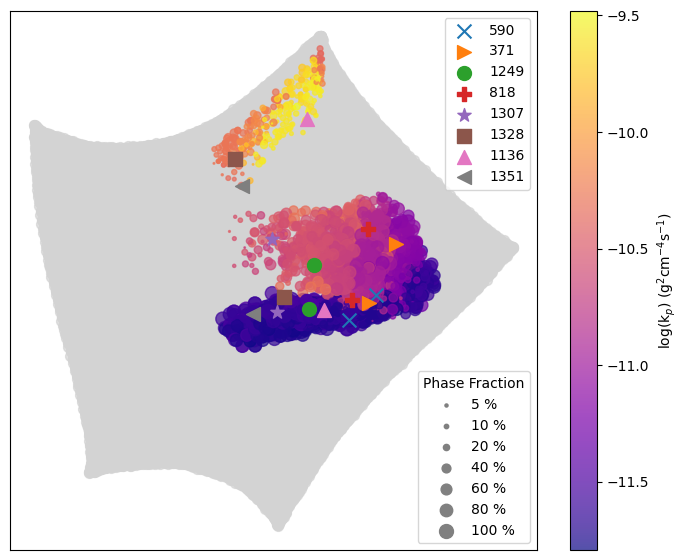

In [55]:
###################keep only the composition with dual phase##############################
df_phasecopy = df_phase.groupby('name').filter(lambda x: len(x) == 2)
df_phasecopy = df_phasecopy.reset_index(drop=True)
# Create scatter plot
fig, ax = plt.subplots(figsize=(8.5,7))
# Main scatter plot
plt.scatter(df['UMAP_1'], df['UMAP_2'], color='lightgrey',s=50, alpha=0.7)
scatter=plt.scatter(df_phasecopy['UMAP_1'], df_phasecopy['UMAP_2'], c=df_phasecopy['kp'], s=df_phasecopy['phase_fraction']*100,
                    cmap='plasma', edgecolors= None, alpha=0.7)
# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label(r'log(k$_{p}$) (g${^2}$cm$^{-4}$s$^{-1}$)')
# Size legend
sizes = [5, 10, 20, 40,60,80,100]
for size in sizes:
    ax.scatter([], [], s=size, c='gray', label=f'{size} %')
size_legend = ax.legend(title='Phase Fraction',loc='lower right')    
# Add the size legend to the plot
ax.add_artist(size_legend)    
############################################################################################################################
special_cases = {
    590.0: { 'marker': 'x', 'label': '590'},  
    371.0: {'marker': '>', 'label': '371'},  
    1249.0: { 'marker': 'o', 'label': '1249'},
    818.0: { 'marker': 'P', 'label': '818'},  
    1307.0: { 'marker': '*', 'label': '1307'},
    1328.0: { 'marker': 's', 'label': '1328'},
    1136.0: { 'marker': '^', 'label': '1136'},
    1351.0: { 'marker': '<', 'label': '1351'}
}
handles=[]
for value, style in special_cases.items():
    special_df = df_phasecopy[df_phasecopy['name'] == value]
    handle = ax.scatter(special_df['UMAP_1'], special_df['UMAP_2'], label=style['label'], marker=style['marker'],s=100)#,edgecolors= None, alpha=0.7
    handles.append(handle)
# Adding legend
# Separate legend for the highlight scatter points
highlight_legend_box = ax.legend(handles=handles, loc='upper right')
plt.xticks([])
plt.yticks([])
dpi = 2400
# plt.savefig('UMAP_phasecomposition prediction.png', bbox_inches='tight', dpi=dpi)
plt.show()

In [57]:
# Apply the function to each group
df_phasecopy = df_phasecopy.groupby('name').apply(fs.calculate_distance)
df_phasecopy = df_phasecopy.dropna(subset=['Distance'])
df_phasecopy['Phase_Rank'] = df_phasecopy['kp'].rank()
df_phasecopy['Distance_Rank'] = df_phasecopy['Distance'].rank()#*beta
df_phasecopy['Phase_Score']=df_phasecopy['Phase_Rank']*df_phasecopy['phase_fraction']#*alpha
df_phasecopy.reset_index(drop=True, inplace=True)
df_phasecopy = df_phasecopy.groupby('name').apply(fs.finalscore)
df_phasecopy
#######final ranking result provided in docs####################
# df_phasecopy.to_csv('FinalRankingResult.csv')#

/tmp/ipykernel_9125/1188812661.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_phasecopy = df_phasecopy.groupby('name').apply(fs.calculate_distance)
